In [ ]:
def show_model_info(model_h):
    for i, v in model_h['hyper_parameters'].items():
        val = v
        if type(val) == str:
            if 'RMSprop' in v: val = 'RMSprop'
        print(i+':', '\t',val)
    duration = model_h.get('train_duration')
    if duration != None: duration = round(duration/60, 1)
    #print(model_h['history'].model.get_config())
    print('train duration:\t', duration)

In [2]:
import os
import helper as hlp
#from keras import layers
#from keras import models

model_filename = '15781_2_7_3_80_base'
model_h = hlp.load('models/' + model_filename)
print('model file name is:', model_filename)
hlp.show_model_plot(model_h);
show_model_info(model_h)
model_h['history'].model.summary()

Using TensorFlow backend.


model file name is: 15781_2_7_3_80_base


<Figure size 2000x500 with 2 Axes>

image_size: 	 150
batch_size: 	 20
epochs: 	 20
steps_per_epoch: 	 92
validation_steps: 	 46
learning_rate: 	 0.001
optimizer: 	 RMSprop
metrics: 	 ['acc']
train duration:	 1.8
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (N

In [3]:
model_h

{'history': <keras.callbacks.History at 0x1d5275cb708>,
 'train_duration': 108,
 'hyper_parameters': {'image_size': 150,
  'batch_size': 20,
  'epochs': 20,
  'steps_per_epoch': 92,
  'validation_steps': 46,
  'learning_rate': 0.001,
  'optimizer': '<keras.optimizers.RMSprop object at 0x000002C074D4A208>',
  'metrics': ['acc']}}

In [4]:
#from keras.applications import VGG16
from keras import backend as K
model = model_h['history'].model
layer_name = 'conv2d_1'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [5]:
grads = K.gradients(loss, model.input)[0]

In [6]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [7]:
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [8]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step

In [9]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [10]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)

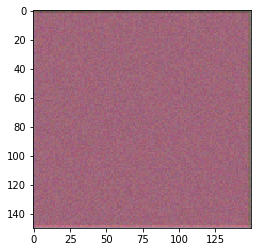

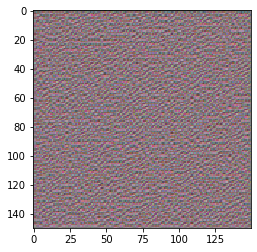

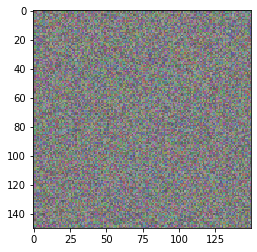

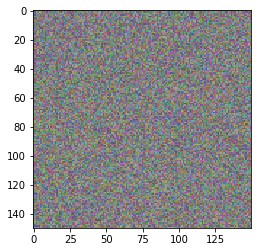

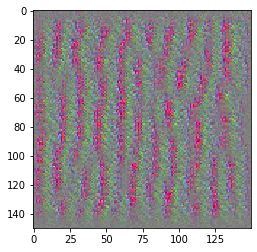

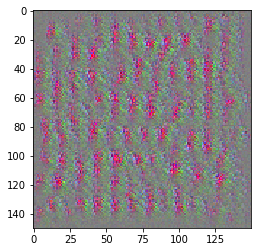

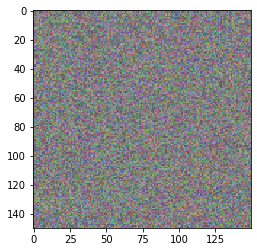

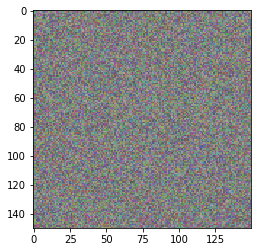

In [11]:
import matplotlib.pyplot as plt
for l in model.layers[:8]:
    plt.imshow(generate_pattern(l.name, 0))
    plt.show()

In [12]:
layer_name = 'conv2d_4'
size = 128
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
hlp.save(results, '.res')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


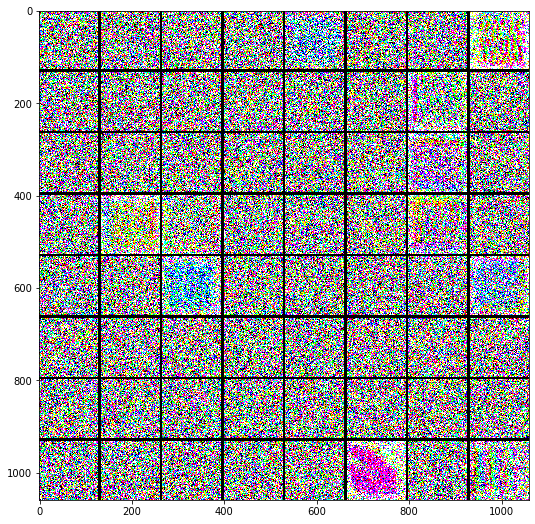

In [70]:
results = hlp.load('.res')
plt.figure(figsize=(9, 9))
plt.imshow(results-120)

In [72]:
layer_name = 'conv2d_3'
size = 128
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
hlp.save(results, '.res2')        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


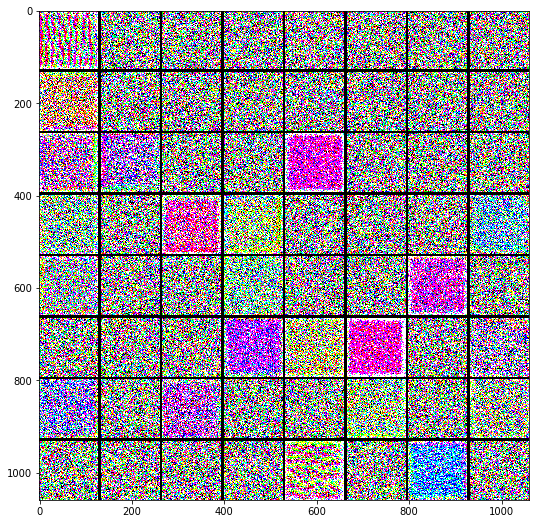

In [73]:
results2 = hlp.load('.res2')
plt.figure(figsize=(9, 9))
plt.imshow(results2-120)

In [12]:
layer_name = 'conv2d_2'
size = 128
margin = 5

results = np.zeros((8 * size + 7 * margin, 4 * size + 7 * margin, 3))

for i in range(8):
    for j in range(4):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
hlp.save(results, '.res3')        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


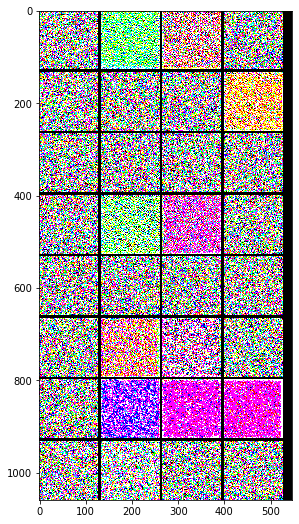

In [17]:
import matplotlib.pyplot as plt
results = hlp.load('.res3')
plt.figure(figsize=(9, 9))
plt.imshow(results-115)

In [25]:
layer_name = 'conv2d_1'
size = 128
margin = 5

results = np.zeros((4 * size + 7 * margin, 4 * size + 7 * margin, 3))

for i in range(4):
    for j in range(4):
        filter_img = generate_pattern(layer_name, i + (j * 4), size=size)
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
hlp.save(results, '.res4')        

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


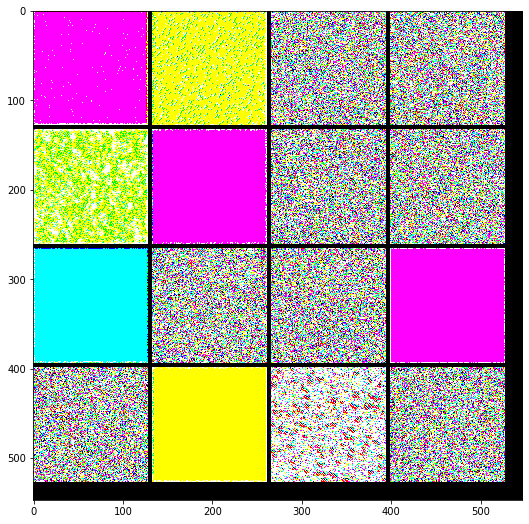

In [45]:
import matplotlib.pyplot as plt
results = hlp.load('.res4')
plt.figure(figsize=(9, 9))
plt.imshow(results-110)